# Sampling Methods

In [92]:
# importing essential libraries
import matplotlib.pyplot as plt
import random
import numpy as np
from scipy.special import erfinv

### General Sampling Method for Exponential Distribution

$$
f(x; \lambda) = \begin{cases}
\lambda e^{-\lambda x} & \text{for } x \ge 0 \\
0 & \text{for } x < 0
\end{cases}
$$

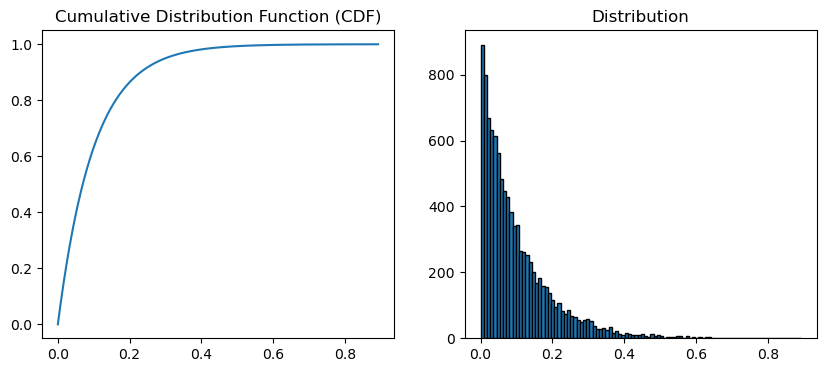

In [93]:
lamda = 10
number_of_samples = 10000
variable_list = []
cdf_list = []

for i in range(number_of_samples):
    z = random.random()
    cdf_list.append(z)

cdf_list.sort()
for j in range(number_of_samples):
    x = -(1 / lamda) * np.log(1 - cdf_list[j])
    variable_list.append(x)


fig, ax = plt.subplots(1, 2, figsize=(10, 4))
ax[0].plot(variable_list, cdf_list)
ax[0].set_title("Cumulative Distribution Function (CDF)")
ax[1].hist(variable_list, bins=100, edgecolor='black')
ax[1].set_title("Distribution")
plt.show()

### General Sampling Method for Normal Distribution

$$
f(x; \mu, \sigma) = \frac{1}{\sigma \sqrt{2\pi}} e^{-\frac{(x - \mu)^2}{2\sigma^2}}
$$

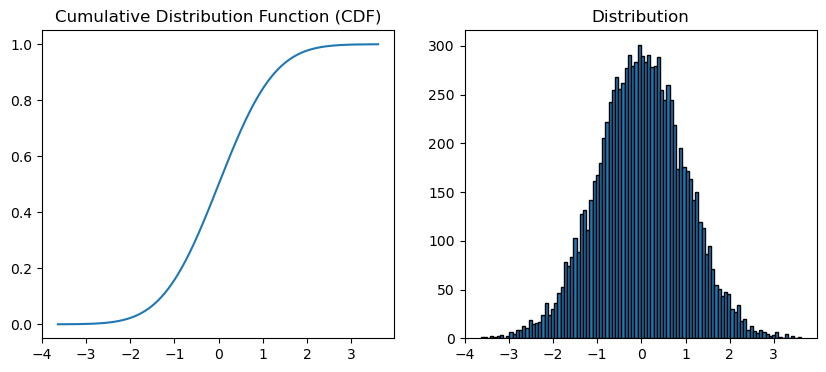

In [94]:
mu = 0
sigma = 1
number_of_samples = 10000
variable_list = []
cdf_list = []

for i in range(number_of_samples):
    z = random.random()
    cdf_list.append(z)

cdf_list.sort()
for j in range(number_of_samples):
    x = mu + sigma * np.sqrt(2) * erfinv(2*cdf_list[j] - 1)
    variable_list.append(x)

fig, ax = plt.subplots(1, 2, figsize=(10, 4))
ax[0].plot(variable_list, cdf_list)
ax[0].set_title("Cumulative Distribution Function (CDF)")
ax[1].hist(variable_list, bins=100, edgecolor='black')
ax[1].set_title("Distribution")
plt.show()

### Rejection Sampling

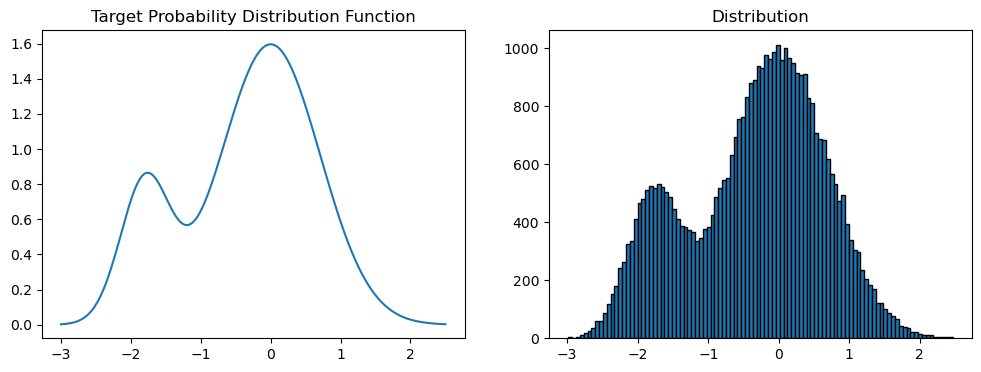

In [95]:
number_of_samples = 100000
variable_list = []
uniform_list_for_variables = []
x_list = np.linspace(-3, 2.5, 1000)
y_list = []

for x in x_list:
    y = (1/np.sqrt(0.5*np.pi))*(2*np.exp(-x**2)+np.exp(-((x+1.8)/0.5)**2))
    y_list.append(y)

for i in range(number_of_samples):
    x = np.random.uniform(-3, 2.5)
    y = (1/np.sqrt(0.5*np.pi))*(2*np.exp(-x**2)+np.exp(-((x+1.8)/0.5)**2))
    k = np.random.uniform(0, max(y_list))
    if (k <= y):
        variable_list.append(x)

fig, ax = plt.subplots(1, 2, figsize=(12, 4))
ax[0].plot(x_list, y_list)
ax[0].set_title("Target Probability Distribution Function")
ax[1].hist(variable_list, bins=100, edgecolor='black')
ax[1].set_title("Distribution")
plt.show()